In [7]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np


In [8]:
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### We only want the data for condominums and apartments, so we filter the rest out

In [11]:
df = pd.read_csv('../data/total_transactions.csv')
# df['property_type'].unique()
df = df[df['property_type'].isin(['Executive Condominium', 'Apartment', 'Condominium'])]


### Do some manual cleaning    

In [22]:
df.loc[df['project_name'] == 'EMERY POINT', 'tenure'] = 'Freehold'

In [23]:
df['tenure'].unique()

array(['99 yrs lease commencing from 2002',
       '99 yrs lease commencing from 2011',
       '99 yrs lease commencing from 1968', 'Freehold',
       '99 yrs lease commencing from 2005',
       '99 yrs lease commencing from 1980',
       '999 yrs lease commencing from 1827',
       '99 yrs lease commencing from 2004',
       '99 yrs lease commencing from 2007',
       '99 yrs lease commencing from 1972',
       '99 yrs lease commencing from 1970',
       '85 yrs lease commencing from 1990',
       '99 yrs lease commencing from 2009',
       '99 yrs lease commencing from 2008',
       '99 yrs lease commencing from 1973',
       '99 yrs lease commencing from 1997',
       '99 yrs lease commencing from 1976',
       '99 yrs lease commencing from 2006',
       '93 yrs lease commencing from 1979',
       '99 yrs lease commencing from 2017',
       '99 yrs lease commencing from 2018',
       '99 yrs lease commencing from 2019',
       '99 yrs lease commencing from 2014',
       '99 yrs leas

### Cleaning up of data
We want to filter out the data that has lease commencing before 2000. We will also be keeping data that is considered to be freehold

In [26]:
filter_year = 2000
df['reference_period'] = pd.to_datetime(df['reference_period'])

df = df[~(df['tenure'] == '-')]

freehold_df = df[df['tenure'].str.contains('hold')]
filtered_df = df[~df['tenure'].str.contains('hold')]
filtered_df.loc[:, 'tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))

filtered_df = filtered_df[(filtered_df['tenure'] > filter_year)]
combined_df = pd.concat([filtered_df, freehold_df])
combined_df

/home/jamesong/Desktop/Projects/housing/server/env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,project_name,street_name,property_type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor,unit_price_psf,reference_period,area_sqm,unit_price_psm
8947,THE SAIL @ MARINA BAY,MARINA BOULEVARD,Apartment,1,CCR,2002,Resale,1,970000,-,592,Strata,06 to 10,1638,2020-10-31,54.998142,17631.432
8948,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,1772714,-,753,Strata,26 to 30,2353,2020-10-31,69.955407,25327.692
8949,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,2921233,-,1141,Strata,26 to 30,2560,2020-10-31,106.001486,27555.840
8950,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,1765997,-,753,Strata,21 to 25,2344,2020-10-31,69.955407,25230.816
8951,THE SAIL @ MARINA BAY,MARINA BOULEVARD,Apartment,1,CCR,2002,Resale,1,1620000,-,861,Strata,11 to 15,1881,2020-10-31,79.988852,20247.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89160,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,Freehold,New Sale,1,749900,-,549,Strata,01 to 05,1366,2016-01-31,51.003344,14703.624
89161,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,Freehold,New Sale,1,660900,-,495,Strata,01 to 05,1335,2016-01-31,45.986622,14369.940
89162,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,Freehold,New Sale,1,882900,-,689,Strata,01 to 05,1282,2016-01-31,64.009662,13799.448
89173,NIM GARDENS,NIM ROAD,Condominium,28,OCR,Freehold,Resale,1,1570000,-,1830,Strata,01 to 05,858,2016-01-31,170.011148,9235.512


In [27]:
combined_df.sort_values('reference_period')

,project_name,street_name,property_type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor,unit_price_psf,reference_period,area_sqm,unit_price_psm
76366,THOMSON IMPRESSIONS,LORONG PUNTONG,Apartment,20,RCR,2015,New Sale,1,686000,-,463,Strata,06 to 10,1482,2015-10-31,43.013750,15952.248
81072,LAKEVILLE,JURONG LAKE LINK,Condominium,22,OCR,2013,New Sale,1,1186931,-,969,Strata,11 to 15,1225,2015-10-31,90.022297,13185.900
81073,LAKEVILLE,JURONG LAKE LINK,Condominium,22,OCR,2013,New Sale,1,1294484,-,1141,Strata,01 to 05,1135,2015-10-31,106.001486,12217.140
48477,SIMS URBAN OASIS,SIMS DRIVE,Condominium,14,RCR,2014,New Sale,1,1337502,-,958,Strata,06 to 10,1396,2015-10-31,89.000372,15026.544
48474,SIMS URBAN OASIS,SIMS DRIVE,Condominium,14,RCR,2014,New Sale,1,824904,-,624,Strata,06 to 10,1321,2015-10-31,57.971014,14219.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59200,TREASURE AT TAMPINES,TAMPINES LANE,Condominium,18,OCR,2018,New Sale,1,995000,-,678,Strata,06 to 10,1467,2020-10-31,62.987737,15790.788
59201,TREASURE AT TAMPINES,TAMPINES LANE,Condominium,18,OCR,2018,New Sale,1,1355000,-,1033,Strata,01 to 05,1311,2020-10-31,95.968042,14111.604
59202,TREASURE AT TAMPINES,TAMPINES LANE,Condominium,18,OCR,2018,New Sale,1,951000,-,678,Strata,11 to 15,1402,2020-10-31,62.987737,15091.128
59205,TREASURE AT TAMPINES,TAMPINES LANE,Condominium,18,OCR,2018,New Sale,1,1765000,-,1324,Strata,01 to 05,1333,2020-10-31,123.002601,14348.412


### Grouping data by postal district

In [30]:
mean_df = combined_df.groupby(['postal_district', 'reference_period'])['unit_price_psf'].mean().unstack(level=0)
mean_df.index


DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
      

<AxesSubplot:xlabel='reference_period'>

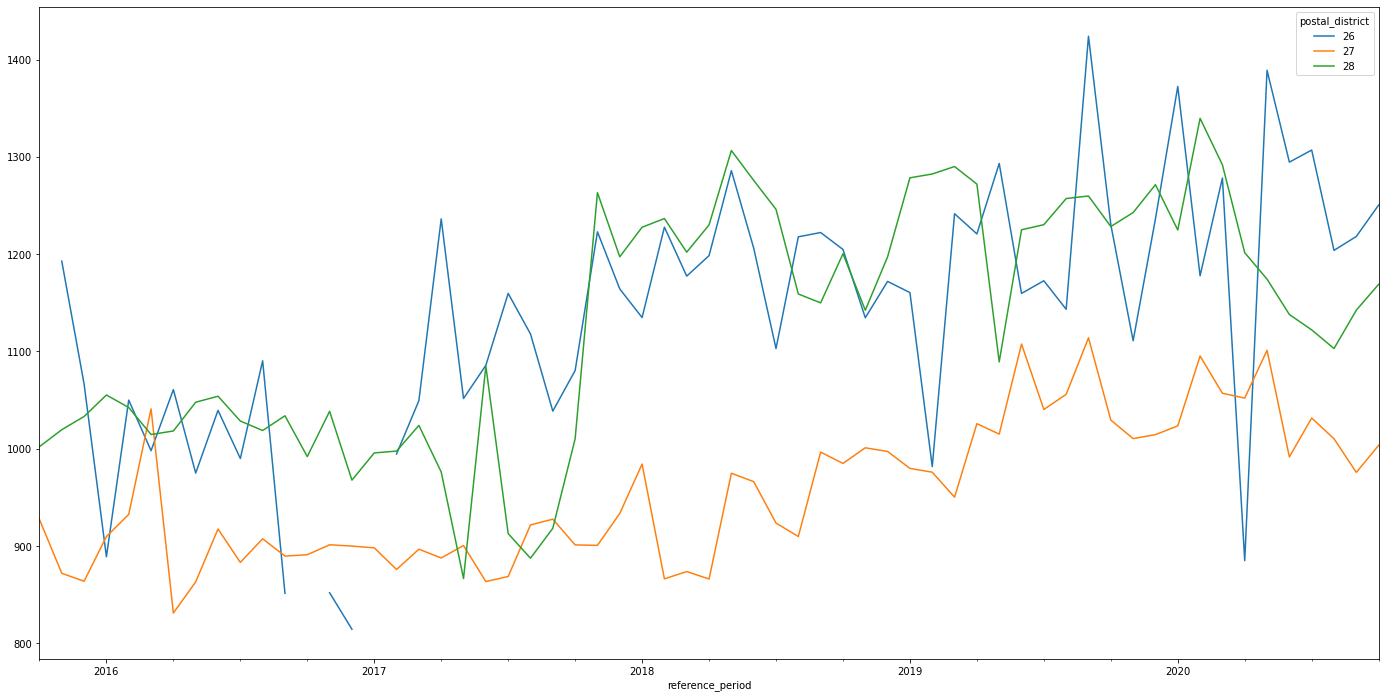

In [31]:
mean_df.plot(figsize=(24,12), y=[26,27,28])

In [42]:
project = 'PARC CLEMATIS'
interest_df = combined_df[(combined_df['project_name'].str.contains(project))].sort_values('reference_period', ascending=False)
print(list(interest_df['project_name'].unique()))
interest_df[['unit_price_psf', 'area_sqft', 'reference_period', 'type_of_sale']]

['PARC CLEMATIS']


,unit_price_psf,area_sqft,reference_period,type_of_sale
18001,1739,689,2020-10-31,New Sale
18080,1640,893,2020-10-31,New Sale
18058,1707,893,2020-10-31,New Sale
18059,1691,689,2020-10-31,New Sale
18064,1624,1238,2020-10-31,New Sale
...,...,...,...,...
19485,1573,452,2019-08-31,New Sale
19486,1604,904,2019-08-31,New Sale
19487,1641,1044,2019-08-31,New Sale
19488,1658,1076,2019-08-31,New Sale


In [43]:
list(interest_df['project_name'].unique())

['PARC CLEMATIS']

In [44]:
min_sqft = 600
max_sqft = 900
filtered_interest_df = interest_df[(interest_df['area_sqft'] >= min_sqft) & 
                                   (interest_df['area_sqft'] <= max_sqft) &
                                   (interest_df['type_of_sale'] == 'New Sale')
                                  ].reset_index(drop=True)
print(len(filtered_interest_df))
print(filtered_interest_df['price'].mean())
print(list(filtered_interest_df['area_sqft'].unique()))
filtered_interest_df.sort_values('reference_period', ascending=False)

435
1221705.6045977012
[689, 893, 721, 700, 710, 861, 883, 624, 743, 829, 732, 850]


,project_name,street_name,property_type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor,unit_price_psf,reference_period,area_sqm,unit_price_psm
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1198000,-,689,Strata,01 to 05,1739,2020-10-31,64.009662,18718.596
10,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1153000,-,689,Strata,01 to 05,1674,2020-10-31,64.009662,18018.936
1,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1465500,-,893,Strata,01 to 05,1640,2020-10-31,82.961724,17652.960
17,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1172000,-,721,Strata,06 to 10,1625,2020-10-31,66.982534,17491.500
16,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1197000,-,721,Strata,16 to 20,1660,2020-10-31,66.982534,17868.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1166000,-,700,Strata,21 to 25,1667,2019-08-31,65.031587,17943.588
371,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1136000,-,700,Strata,11 to 15,1624,2019-08-31,65.031587,17480.736
370,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1395000,-,861,Strata,11 to 15,1620,2019-08-31,79.988852,17437.680
369,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,2019,New Sale,1,1148000,-,732,Strata,06 to 10,1568,2019-08-31,68.004459,16877.952


In [45]:
filtered_interest_df.groupby(['reference_period'])['area_sqft'].count()

reference_period
2019-08-31    89
2019-09-30    40
2019-10-31    12
2019-11-30    16
2019-12-31    14
2020-01-31    14
2020-02-29    17
2020-03-31    16
2020-04-30     6
2020-05-31    31
2020-06-30    56
2020-07-31    45
2020-08-31    46
2020-09-30    15
2020-10-31    18
Name: area_sqft, dtype: int64

In [46]:
filtered_interest_df.groupby(['reference_period'])['unit_price_psf'].mean()

reference_period
2019-08-31    1611.707865
2019-09-30    1601.875000
2019-10-31    1561.916667
2019-11-30    1623.625000
2019-12-31    1613.785714
2020-01-31    1607.357143
2020-02-29    1565.882353
2020-03-31    1606.562500
2020-04-30    1573.833333
2020-05-31    1590.580645
2020-06-30    1637.910714
2020-07-31    1639.955556
2020-08-31    1646.413043
2020-09-30    1642.400000
2020-10-31    1677.333333
Name: unit_price_psf, dtype: float64

<AxesSubplot:xlabel='reference_period'>

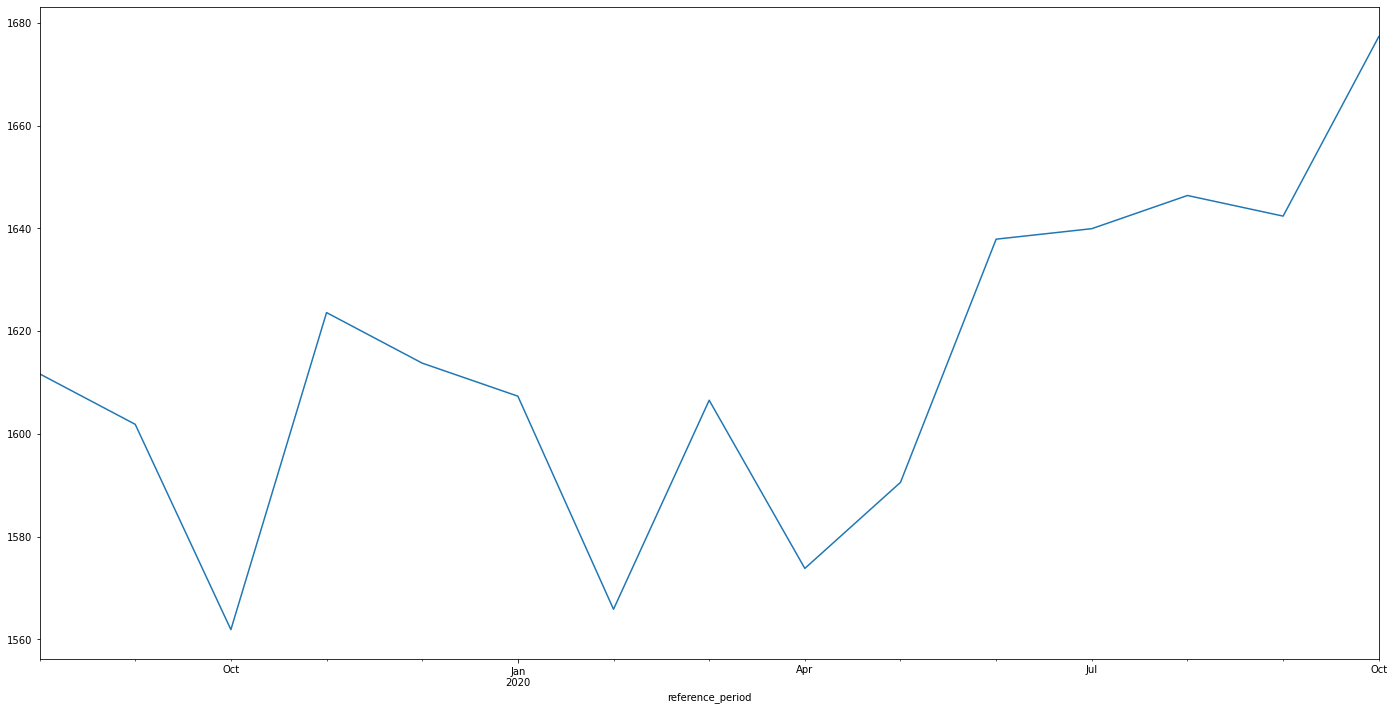

In [47]:
graphing_interest_df = filtered_interest_df.groupby(['reference_period'])['unit_price_psf'].mean()
graphing_interest_df
graphing_interest_df.plot(figsize=(24,12))

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
combined_df[combined_df['postal_district'] == 26].sort_values(['project_name', 'unit_price_psf'])

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
53864,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1107000,-,1259,Strata,01 to 05,879,2017-03-31
53842,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1100000,-,1238,Strata,06 to 10,889,2017-05-31
53795,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1700000,-,1873,Strata,11 to 15,908,2017-09-30
53790,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1160000,-,1238,Strata,01 to 05,937,2017-10-31
53781,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1168888,-,1238,Strata,01 to 05,944,2017-10-31
53862,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1190000,-,1259,Strata,06 to 10,945,2017-03-31
53824,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1175000,-,1238,Strata,06 to 10,949,2017-07-31
53857,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1600000,-,1658,Strata,11 to 15,965,2017-04-30
53814,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,800000,-,807,Strata,01 to 05,991,2017-07-31
53832,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,805000,-,807,Strata,06 to 10,997,2017-06-30


In [24]:
df1 = pd.read_csv('data/private_prop_transactions/total_transactions.csv')
sorted(df1['reference_period'].unique())

['2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31']

In [27]:
df1.sort_values(['reference_period', 'project'])
df1.drop_duplicates().sort_values(['reference_period', 'project'])

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure
25444,34643.794200,31880.644800,WOODSVILLE CLOSE,18 WOODSVILLE,RCR,117.0,1259.377519,1500000.0,NaN,12820.512821,1191.064615,11-15,1.0,2017-04-30,3,Apartment,13,Strata,Freehold
48762,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
76327,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
14846,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1266878.0,NaN,28792.681818,2674.927670,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
14860,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1221713.0,NaN,27766.204545,2579.564811,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49216,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
76477,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
129179,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
59592,35393.769191,12263.162700,YUNNAN CRESCENT,YUNNAN GARDENS,OCR,236.9,2549.970378,2420000.0,NaN,10215.280709,949.030632,-,1.0,2020-03-31,3,Terrace,22,Land,Freehold


In [9]:
combined_df

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
3,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,348.0,3745.840826,4400000.0,NaN,12643.678161,1174.636138,06-10,1,2018-09-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
4,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3600000.0,NaN,16071.428571,1493.084571,01-05,1,2018-03-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
5,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,226.0,2432.643755,3450000.0,NaN,15265.486726,1418.210123,01-05,1,2019-02-28,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
6,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,223.0,2400.352024,3580000.0,NaN,16053.811659,1491.447906,01-05,1,2018-01-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
7,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3700000.0,NaN,16517.857143,1534.559142,01-05,1,2017-11-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75900,31356.695820,33639.595020,TANJONG RHU ROAD,EMERALD EAST,RCR,191.0,2055.906890,2750000.0,NaN,14397.905759,1337.609214,11-15,1,2020-08-31,Resale,Apartment,15,Strata,Freehold,2020-08-14 22:16:20.640487
75916,NaN,NaN,JALAN REMAJA,MONT BOTANIK RESIDENCE,OCR,72.0,775.001550,1286800.0,NaN,17872.222222,1660.383775,06-10,1,2020-08-31,New Sale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
75917,NaN,NaN,JALAN REMAJA,MONT BOTANIK RESIDENCE,OCR,72.0,775.001550,1301900.0,NaN,18081.944444,1679.867607,06-10,1,2020-08-31,New Sale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
75920,38094.331319,20479.045553,HILLVIEW AVENUE,HILLVIEW HEIGHTS,OCR,113.0,1216.321877,1500000.0,NaN,13274.336283,1233.226194,01-05,1,2020-08-31,Resale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
